In [2]:
from LMXB_System import doMotion, LMXB_Sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import TrajTools
import astropy.units as u
from notebook_helper import params, color_array, plot_trajectory
import astropy.constants as c
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
plt.rcParams.update({'font.size': 22})
Msun = c.M_sun.value
print(Msun)
M_d, M_b, M_n, M_dm =[1.45e11*Msun, 9.3e9*Msun, 1.0e10*Msun, 3.205e6 * 2.325e5 * Msun ]

1.988409870698051e+30


# Black Hole Trajectories
<span style="font-family:Papyrus; font-size:1em;">

 
\
Just like everything else in the universe, black holes obey Newton's Second Law:

# $$F=ma$$

where

**$m$** is the mass of the black hole

 $a$ is its acceleration, and
 
 $F$ is the gravitational force of the galaxy
</span>

# The Galactic Force

<span style="font-family:Papyrus; font-size:1.em;">

The force that the black hole feels from the galaxy depends on its position in the galaxy, as well as the shape and mass distribution of the galaxy. The Milky Way can be modeled with four parts:

**The Disk** with mass $M_{d}$. This is where we live! \
\
**The Nucleus** with mass $M_{n}$. It's home to the supermassive black hole Sagittarius A. \
\
**The Bulge** with mass $M_{b}$. It's the central star-forming region of our galaxy. \
\
**Dark Matter** with mass $M_{dm}$. We don't know what it's made of, but there's probably a lot of it in our galaxy. \

\
\
Now let's make our own Milky Way. First we'll use the real values for these masses.
</span>

<span style="font-family:Papyrus; font-size:1.5em;">
</span>


In [37]:
Md = 1.45e11*Msun
Mb = 9.3e9*Msun
Mn = 1e10*Msun
Mdm = 745162500000* Msun


In [38]:
print(Md)

2.883194312512174e+41


<span style="font-family:Papyrus; font-size:1.5em;">
Now let's take the black hole in the low-mass X-ray binary GRO J1655, and see what happens when we let it fly for 2 billion years
</span>


In [3]:
black_hole = LMXB_Sys('GROJ1655')

doMotion(black_hole,1.0, M = [Md,Mb,Mn,Mdm])


NameError: name 'Md' is not defined

<span style="font-family:Papyrus; font-size:1.5em;">
What happens if we take away the Dark Matter?
</span>


In [ ]:
Mdm = 0


In [28]:
lmxb = LMXB_Sys('GROJ1655')
doMotion(lmxb,1.0, M = [Md,Mb,Mn,Mdm])


In [33]:
lmxb.X

array([-4.96180442, -4.96180442, -4.96180442, ..., -0.70428555,
       -0.64576903, -0.61201803])

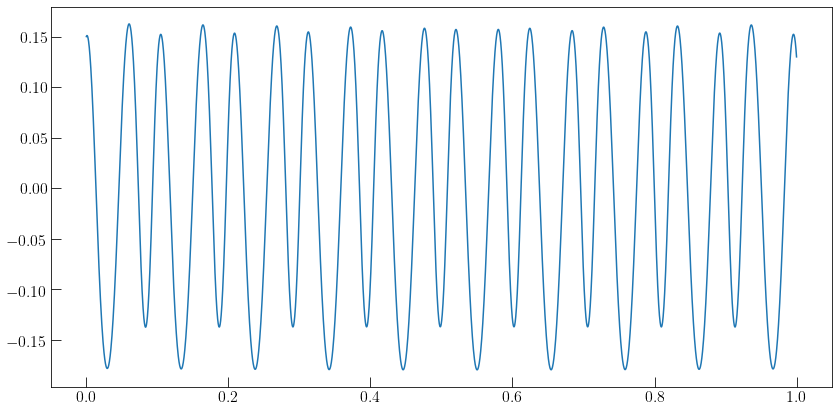

In [36]:
plt.plot(lmxb.t,lmxb.Z)

<span style="font-family:Papyrus; font-size:1.5em;">
Hmmm, turns out not much. What happens if we get rid of the bulge too
</span>


In [ ]:
Mb = 0
Md = 0
Mn = 0

In [ ]:
black_hole = LMXB_Sys('GROJ1655')

doMotion(black_hole,2.0, M = [Md,Mb,Mn,Mdm])
plot_trajectory(black_hole.X,black_hole.Y,black_hole.Z)

<span style="font-family:Papyrus; font-size:1.5em;">
It escaped!
</span>


In [ ]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)
def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line
anim = FuncAnimation(fig, animate, frames=100, interval=20)
plt.show()

In [ ]:
sys = LS.LMXB_Sys('GROJ1655')


In [ ]:
X = np.linspace(.1,20,300)*u.kpc.to(u.m)
vrot = np.array([TrajTools.getVrot(X=x,Y=0,Z=0) for x in X])
plt.semilogy(X*u.m.to(u.kpc),vrot*u.m.to(u.km))
plt.ylim(0,300)
plt.xlim(0,15)
plt.show()

In [ ]:
LS.doMotion(sys,2.0)
Xc, Yc, Zc, Vpecc,tc = sys.X, sys.Y, sys.Z, sys.Vpec, sys.t
fig = plt.figure(figsize=(20,3))
ax1 = fig.add_subplot(1,3,1,aspect='equal')
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.plot(Xc, Yc, color=c)
ax2.plot(Xc, Zc, color=c)
ax3.plot(tc, Vpecc, color=c)

In [ ]:
x = LS.getCrossings(sys)

In [ ]:
Zc

In [ ]:
c = color_array[1]
fig = plt.figure(figsize=(20,3))
ax1 = fig.add_subplot(1,3,1,aspect='equal')
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.axhline(0,ls = '--')
ax1.axvline(0,ls = '--')
ax2.axhline(0,ls = '--')
ax2.axvline(0,ls = '--')

ax1.set_xlabel('X (kpc)')
ax1.set_ylabel('Y (kpc)')

ax2.set_xlabel('X (kpc)')
ax2.set_ylabel('Z (kpc)')

ax3.set_xlabel('t (Gyr)')
ax3.set_ylabel('$V_{pec}$ (km/s)')
vpecs=[]
rand_params = []
vbirth = []
for i in range(100):
    print(i)
    sys.setRandUVWXYZ(skew=False)
    LS.doMotion(sys,2.0)
    vpecs.append(sys.Vpec[0])
    ax1.plot(sys.X,sys.Y,'.7')
    ax2.plot(sys.X,sys.Z,'.7')
    ax3.plot(sys.t,sys.Vpec,'.7')
    if max(np.sqrt(sys.X**2+sys.Y**2))>50: 
        print(sys.Vpec[0])
        rand_params.append(sys.randparams)
    crossings = LS.getCrossings(sys)
    vbirth.extend(crossings[-1])

ax1.plot(Xc, Yc, color=c)
ax2.plot(Xc, Zc, color=c)
ax3.plot(tc, Vpecc, color=c)
#ax1.set_xlim(-30,30)
#ax1.set_ylim(-30,30)
#ax2.set_xlim(-30,30)
#ax2.set_ylim(-5,5)
fig.savefig('J1305_traj.png')
plt.show()

In [ ]:
print(V)

In [ ]:
plt.hist(vbirth,30,histtype='step', lw=3, color=color_array[0],normed=True)
plt.xlabel('$V_{\mathrm{pec,birth}}$ (km/s)')
plt.legend()
plt.show()

In [ ]:
ax3.set_ylabel('$V_{pec,birth}$ (km/s)')

In [ ]:
plt.hist(vpecs)
plt.show()

In [ ]:
Vx, Vy, Vz = [], [], []
for i in range(1000):
    sys.setRandUVWXYZ(skew=True)
    Vx.append(sys.Vx0)
    Vy.append(sys.Vy0)
    Vz.append(sys.Vz0)


In [ ]:
def get_stats(x,quantiles=[16,50,84]):
    low, med, high = np.percentile(x,quantiles)
    print('{}(+{}, -{})'.format(med,high-med,med-low))
    print('2 sigma {}-{}'.format(low,high))
print(get_stats(Vx))
print(get_stats(Vy))
print(get_stats(Vz))



In [ ]:
for ii in rand_params: print(ii)
print((11.15-7.5)/1.8)

In [ ]:
print(sys.X[0],sys.Y[0],sys.Z[0],sys.Vx[0],sys.Vy[0],sys.Vz[0])

In [ ]:
plt.plot(sys.t,sys.Vpec)
plt.show()

In [ ]:
range(2)